## Import the dependencies

In [1]:
import keras

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, AveragePooling2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers

import numpy as np
from matplotlib import pyplot

## Create the model

In [21]:
def get_model():
    md = Sequential()
    
    # input 1_28x28 or 1_32x32
    # CONV_1 6_28x28 f(5x5) ?
    md.add(Conv2D(filters=6, kernel_size=5, strides=1,
                  padding='same', input_shape=(28, 28, 1),
                  activation='tanh'))
    
    # AVG_POOL_2 2x2 6_14x14
    md.add(AveragePooling2D(pool_size=(2, 2)))
    
    
    # CONV_3 16_10x10 f(5x5)
    md.add(Conv2D(filters=16, kernel_size=5, strides=1,
                  padding='valid', activation='tanh'))
    
    # AVG_POOL_4 2x2 16_5x5
    md.add(AveragePooling2D(pool_size=(2, 2)))
    
    # CONV_5 120_5x5 f(5x5)
    md.add(Conv2D(120, kernel_size=5, strides=1,
                 padding='valid', activation='tanh'))
    md.add(Activation('tanh'))
    
    # FLATTEN
    md.add(Flatten())
    
    # FC_6 84
    md.add(Dense(84, activation='tanh'))
    
    # FC_7 10
    md.add(Dense(10, activation='softmax'))
    
    return md

In [22]:
model = get_model()

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
activation_5 (Activation)    (None, 1, 1, 120)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)              

## Prepare data from cifar_10:

In [35]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
x_test.shape

(10000, 28, 28)

## Visualize the first six training images:

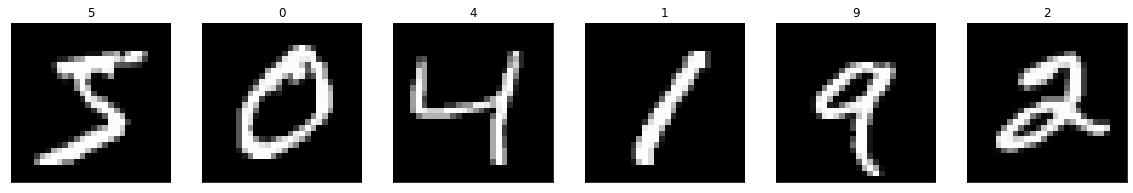

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# plot first 6 training images:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

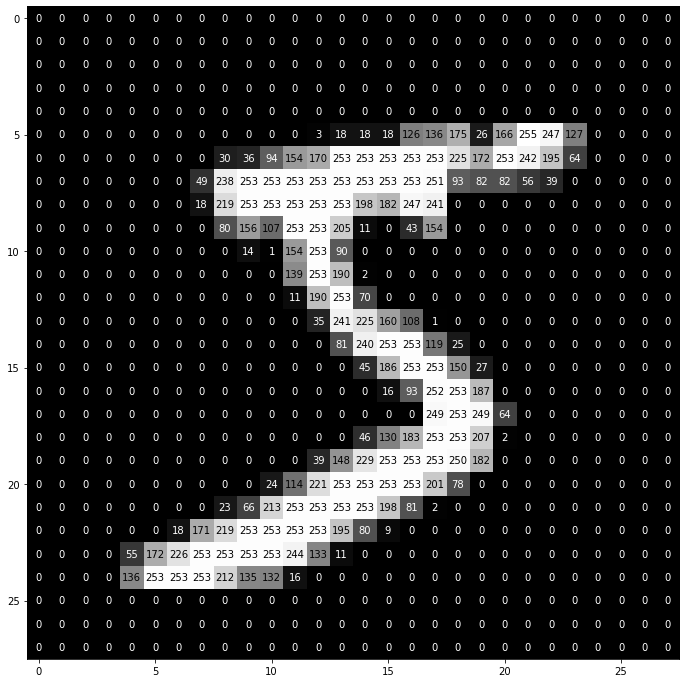

In [41]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)

In [42]:
# normalize the data to accelerate learning:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean) / (std+1e-7)
x_test = (x_test-mean) / (std+1e-7)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [43]:
# one-hot encoding

num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [44]:
# reshape data to fit our CNN (and input_shape):

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [45]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [46]:
x_train.shape

(55000, 28, 28, 1)

In [47]:
x_valid.shape

(5000, 28, 28, 1)

## Train the model

In [48]:
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [49]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100,
                 validation_data=(x_valid, y_valid),
                 verbose=2, shuffle=True)

Epoch 1/100
430/430 - 4s - loss: 0.9448 - accuracy: 0.7091 - val_loss: 0.4181 - val_accuracy: 0.8718
Epoch 2/100
430/430 - 2s - loss: 0.3855 - accuracy: 0.8836 - val_loss: 0.3188 - val_accuracy: 0.8982
Epoch 3/100
430/430 - 2s - loss: 0.3136 - accuracy: 0.9042 - val_loss: 0.2634 - val_accuracy: 0.9208
Epoch 4/100
430/430 - 2s - loss: 0.2659 - accuracy: 0.9182 - val_loss: 0.2219 - val_accuracy: 0.9324
Epoch 5/100
430/430 - 2s - loss: 0.2304 - accuracy: 0.9285 - val_loss: 0.1966 - val_accuracy: 0.9396
Epoch 6/100
430/430 - 2s - loss: 0.2024 - accuracy: 0.9375 - val_loss: 0.1724 - val_accuracy: 0.9462
Epoch 7/100
430/430 - 2s - loss: 0.1807 - accuracy: 0.9437 - val_loss: 0.1567 - val_accuracy: 0.9536
Epoch 8/100
430/430 - 2s - loss: 0.1639 - accuracy: 0.9488 - val_loss: 0.1424 - val_accuracy: 0.9546
Epoch 9/100
430/430 - 2s - loss: 0.1501 - accuracy: 0.9538 - val_loss: 0.1332 - val_accuracy: 0.9582
Epoch 10/100
430/430 - 2s - loss: 0.1386 - accuracy: 0.9569 - val_loss: 0.1257 - val_accura

In [50]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores[1] * 100, scores [0]))

79/79 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9791
Test result: 97.910 loss: 0.096


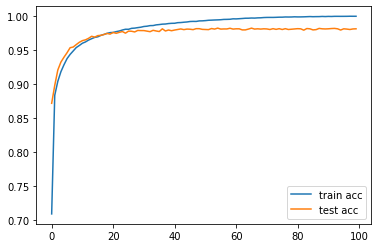

In [51]:
pyplot.plot(history.history['accuracy'], label='train acc')
pyplot.plot(history.history['val_accuracy'], label='test acc')
pyplot.legend()
pyplot.show()

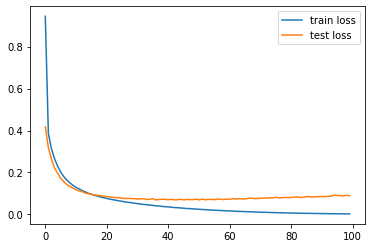

In [52]:
pyplot.plot(history.history['loss'], label='train loss')
pyplot.plot(history.history['val_loss'], label='test loss')
pyplot.legend()
pyplot.show()

# My some tests:

## Tesing with Max Pooling

In [57]:
def get_model_max_pool():
    md = Sequential()
    
    # input 1_28x28 or 1_32x32
    # CONV_1 6_28x28 f(5x5) ?
    md.add(Conv2D(filters=6, kernel_size=5, strides=1,
                  padding='same', input_shape=(28, 28, 1),
                  activation='tanh'))
    
    # AVG_POOL_2 2x2 6_14x14
    md.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    # CONV_3 16_10x10 f(5x5)
    md.add(Conv2D(filters=16, kernel_size=5, strides=1,
                  padding='valid', activation='tanh'))
    
    # AVG_POOL_4 2x2 16_5x5
    md.add(MaxPooling2D(pool_size=(2, 2)))
    
    # CONV_5 120_5x5 f(5x5)
    md.add(Conv2D(120, kernel_size=5, strides=1,
                 padding='valid', activation='tanh'))
    
    # FLATTEN
    md.add(Flatten())
    
    # FC_6 84
    md.add(Dense(84, activation='tanh'))
    
    # FC_7 10
    md.add(Dense(10, activation='softmax'))
    
    return md

In [58]:
model2 = get_model_max_pool()
model2.summary()
model2.compile(loss='categorical_crossentropy',
               optimizer='adamax',
               metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_5 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [59]:
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=100,
                      validation_data=(x_valid, y_valid),
                      verbose=2, shuffle=True)

Epoch 1/100
430/430 - 2s - loss: 0.8906 - accuracy: 0.7309 - val_loss: 0.3397 - val_accuracy: 0.8994
Epoch 2/100
430/430 - 1s - loss: 0.2894 - accuracy: 0.9132 - val_loss: 0.2298 - val_accuracy: 0.9320
Epoch 3/100
430/430 - 2s - loss: 0.2132 - accuracy: 0.9356 - val_loss: 0.1733 - val_accuracy: 0.9510
Epoch 4/100
430/430 - 2s - loss: 0.1666 - accuracy: 0.9491 - val_loss: 0.1384 - val_accuracy: 0.9594
Epoch 5/100
430/430 - 2s - loss: 0.1351 - accuracy: 0.9592 - val_loss: 0.1159 - val_accuracy: 0.9654
Epoch 6/100
430/430 - 2s - loss: 0.1142 - accuracy: 0.9657 - val_loss: 0.1019 - val_accuracy: 0.9684
Epoch 7/100
430/430 - 2s - loss: 0.1007 - accuracy: 0.9691 - val_loss: 0.0931 - val_accuracy: 0.9712
Epoch 8/100
430/430 - 2s - loss: 0.0901 - accuracy: 0.9726 - val_loss: 0.0851 - val_accuracy: 0.9738
Epoch 9/100
430/430 - 2s - loss: 0.0826 - accuracy: 0.9745 - val_loss: 0.0792 - val_accuracy: 0.9764
Epoch 10/100
430/430 - 2s - loss: 0.0759 - accuracy: 0.9767 - val_loss: 0.0754 - val_accura

In [60]:
scores2 = model2.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores2[1] * 100, scores [0]))

79/79 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9890
Test result: 98.900 loss: 0.096


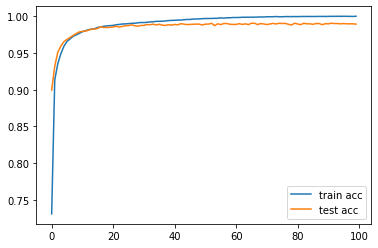

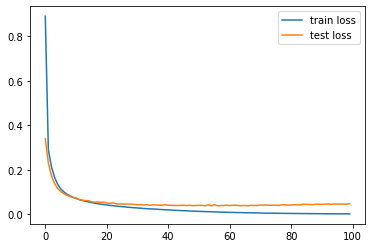

In [61]:
pyplot.plot(history2.history['accuracy'], label='train acc')
pyplot.plot(history2.history['val_accuracy'], label='test acc')
pyplot.legend()
pyplot.show()

pyplot.plot(history2.history['loss'], label='train loss')
pyplot.plot(history2.history['val_loss'], label='test loss')
pyplot.legend()
pyplot.show()

## Tesing with ReLU

In [62]:
def get_model_relu():
    md = Sequential()
    
    # input 1_28x28 or 1_32x32
    # CONV_1 6_28x28 f(5x5) ?
    md.add(Conv2D(filters=6, kernel_size=5, strides=1,
                  padding='same', input_shape=(28, 28, 1),
                  activation='relu'))
    
    # AVG_POOL_2 2x2 6_14x14
    md.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    # CONV_3 16_10x10 f(5x5)
    md.add(Conv2D(filters=16, kernel_size=5, strides=1,
                  padding='valid', activation='relu'))
    
    # AVG_POOL_4 2x2 16_5x5
    md.add(MaxPooling2D(pool_size=(2, 2)))
    
    # CONV_5 120_5x5 f(5x5)
    md.add(Conv2D(120, kernel_size=5, strides=1,
                 padding='valid', activation='relu'))
    
    # FLATTEN
    md.add(Flatten())
    
    # FC_6 84
    md.add(Dense(84, activation='relu'))
    
    # FC_7 10
    md.add(Dense(10, activation='softmax'))
    
    return md

In [63]:
model3 = get_model_relu()
model3.summary()
model3.compile(loss='categorical_crossentropy',
               optimizer='adamax',
               metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_6 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 84)               

In [64]:
history3 = model3.fit(x_train, y_train, batch_size=128, epochs=100,
                      validation_data=(x_valid, y_valid),
                      verbose=2, shuffle=True)

Epoch 1/100
430/430 - 2s - loss: 1.2184 - accuracy: 0.6261 - val_loss: 0.5419 - val_accuracy: 0.8352
Epoch 2/100
430/430 - 2s - loss: 0.4712 - accuracy: 0.8563 - val_loss: 0.3894 - val_accuracy: 0.8776
Epoch 3/100
430/430 - 2s - loss: 0.3461 - accuracy: 0.8949 - val_loss: 0.2958 - val_accuracy: 0.9096
Epoch 4/100
430/430 - 2s - loss: 0.2726 - accuracy: 0.9165 - val_loss: 0.2275 - val_accuracy: 0.9328
Epoch 5/100
430/430 - 2s - loss: 0.2193 - accuracy: 0.9333 - val_loss: 0.1804 - val_accuracy: 0.9474
Epoch 6/100
430/430 - 2s - loss: 0.1823 - accuracy: 0.9447 - val_loss: 0.1554 - val_accuracy: 0.9538
Epoch 7/100
430/430 - 2s - loss: 0.1557 - accuracy: 0.9525 - val_loss: 0.1323 - val_accuracy: 0.9614
Epoch 8/100
430/430 - 2s - loss: 0.1354 - accuracy: 0.9591 - val_loss: 0.1229 - val_accuracy: 0.9636
Epoch 9/100
430/430 - 2s - loss: 0.1209 - accuracy: 0.9624 - val_loss: 0.1033 - val_accuracy: 0.9710
Epoch 10/100
430/430 - 2s - loss: 0.1086 - accuracy: 0.9662 - val_loss: 0.0985 - val_accura

In [65]:
scores3 = model3.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores2[1] * 100, scores [0]))

79/79 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9890
Test result: 98.900 loss: 0.096


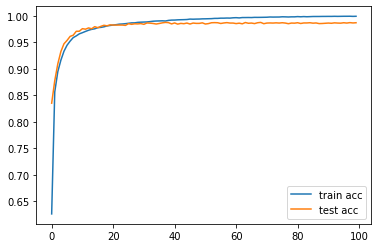

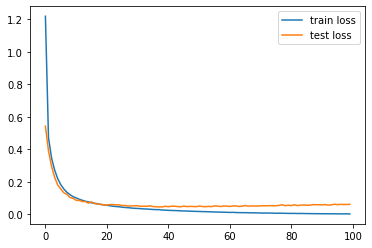

In [66]:
pyplot.plot(history3.history['accuracy'], label='train acc')
pyplot.plot(history3.history['val_accuracy'], label='test acc')
pyplot.legend()
pyplot.show()

pyplot.plot(history3.history['loss'], label='train loss')
pyplot.plot(history3.history['val_loss'], label='test loss')
pyplot.legend()
pyplot.show()